In [ ]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

def change_bit(vector,n):  ##將第n位從0轉成1或者從1轉成0 
  vector = list(vector)
  vector[n] = str(int(not bool(int(vector[n]))))
  return ''.join(vector)

def return_value(vector):  ##隨機選擇1位轉換然後返回值
  bit = random.randint(0,99)
  return change_bit(vector, bit)

def evaluate(vector1, vector2): 
    return vector1.count("1") <= vector2.count("1") ##判斷新的solution是否好過當前的最優解

def p_alpha(new_solution, old_solution, psi, maximum = True): #計算接受概率
  if (maximum and (not evaluate(new_solution, old_solution))) or ((not maximum) and evaluate(new_solution, old_solution)):
    return 1
  else:
    return math.exp((2 * maximum - 1)*(new_solution.count("1") - old_solution.count("1"))/psi)

def anealing(psi): ##降溫
  return 0.9 * psi


In [ ]:
max_iteration = 1000
max_run = 30
record = np.zeros((max_run, max_iteration), dtype='int') ##紀錄信息

for i in range(max_run):
  psi = 30
  vector = bin(random.randint(0,int("1"*100, 2)))[2:].zfill(100) ##隨機生成數字轉換成2進制作為初始變量
  for j in range(max_iteration):
    r = random.uniform(0,1)
    new_solution = return_value(vector)
    if r < p_alpha(new_solution, vector, psi, maximum = True): 
      vector = new_solution
    record[i,j] = vector.count("1")
    psi = anealing(psi)

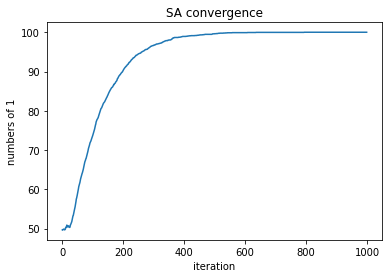

In [ ]:
average_record = np.mean(record, axis = 0) ##取30次平均
plt.title('SA convergence')
plt.xlabel('iteration')
plt.ylabel('numbers of 1')
plt.plot(range(max_iteration), average_record, '-') ##畫出收斂圖